# 1.단순 비선형 회귀 예측 모델(Support Vector Regression : Radial Basis Function)

> *이 노트는 [머신러닝과 딥러닝을 활용한 비트코인 가격예측 데이터분석](../upbitAnalyzer_data_analysis_report.ipynb)의 *모델 선택* 과정에서 생성되었습니다.*

- **데이터소스:** BTC/KRW(비트코인 대 한국 원화) - 2022년 9월 17일부터 가장 최근의 일간 조정 종가(Adjusted Close)
- **입력 변수:** 단순 회귀 분석 모델에서는 예측에 사용되는 하나의 독립 변수를 선택합니다. 이 변수는 BTC/KRW 가격에 영향을 미치는 요인으로 선택되며, 주로 경제적인 지표나 기술적 분석 지표로 구성될 수 있습니다.
- **종속 변수:** BTC/KRW 가격으로 설정되며, 이를 예측하는 것이 목표입니다.
- **모델 구조:** 단순 회귀 분석 모델은 선형 회귀 모델로 구성됩니다. 주어진 입력 변수와 BTC/KRW 가격 간의 선형 관계를 모델링하고, 이를 기반으로 예측을 수행합니다.
- **학습 및 예측:** 모델은 학습 데이터를 기반으로 회귀 계수를 추정하고, 이를 사용하여 새로운 데이터에서 BTC/KRW 가격을 예측합니다. 학습은 일반적으로 최소 제곱법 등의 회귀 분석 기법을 사용하여 수행됩니다.
- **모델 평가:** 학습된 모델의 성능은 주로 평균 제곱 오차(Mean Squared Error)나 결정 계수(Coefficient of Determination) 등의 지표를 사용하여 평가됩니다. 이를 통해 모델의 예측 정확도를 평가하고 비교할 수 있습니다.

일반적으로 비트코인 가격 예측을 위해 단순 회귀 분석을 수행하는 것은 일반적으로 좋은 선택이 아닙니다. 비트코인 가격은 시계열 데이터로서 많은 변동성을 가지고 있으며, 비선형적인 패턴을 따르는 경우가 많습니다. 따라서 비트코인 가격 예측에는 시계열 분석 기법 중 하나인 ARIMA(AutoRegressive Integrated Moving Average)나 LSTM(Long Short-Term Memory)과 같은 딥러닝 모델을 사용하는 것이 더 적합합니다.

## 데이터 수집
BTC/KRW(비트코인 대 한국 원화) - 2022년 9월 17일부터 가장 최근의 조정 종가(Adjusted Close)

In [178]:
from pandas_datareader import data as pdr
import yfinance as yfin
from datetime import date, datetime

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2013,1,1)

# BTC(KRW)
yfin.pdr_override()

btc_krwname = 'Bitcoin(KRW)'
btc_krw = 'BTC-KRW'
btc_krw_df = pdr.get_data_yahoo(btc_krw, start=date_start, end=date_today)

print(btc_krw_df.shape)
btc_krw_df

[*********************100%***********************]  1 of 1 completed
(3173, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,4.826118e+05,4.838110e+05,4.681210e+05,4.732035e+05,4.732035e+05,21787470960
2014-09-18,4.727130e+05,4.762765e+05,4.309914e+05,4.428182e+05,4.428182e+05,35976322560
2014-09-19,4.424667e+05,4.475154e+05,4.012784e+05,4.119893e+05,4.119893e+05,39571102935
2014-09-20,4.118610e+05,4.417305e+05,4.068624e+05,4.267118e+05,4.267118e+05,38469009780
2014-09-21,4.258571e+05,4.303872e+05,4.103040e+05,4.161897e+05,4.161897e+05,27737663355
...,...,...,...,...,...,...
2023-05-21,3.563324e+07,3.598615e+07,3.557285e+07,3.595226e+07,3.595226e+07,9335951759493
2023-05-22,3.593747e+07,3.613293e+07,3.539319e+07,3.545438e+07,3.545438e+07,11459626783399
2023-05-23,3.544918e+07,3.556857e+07,3.510552e+07,3.528741e+07,3.528741e+07,14530586645292


### 전처리 및 모델

c:\Users\creat\project\time-series-da\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


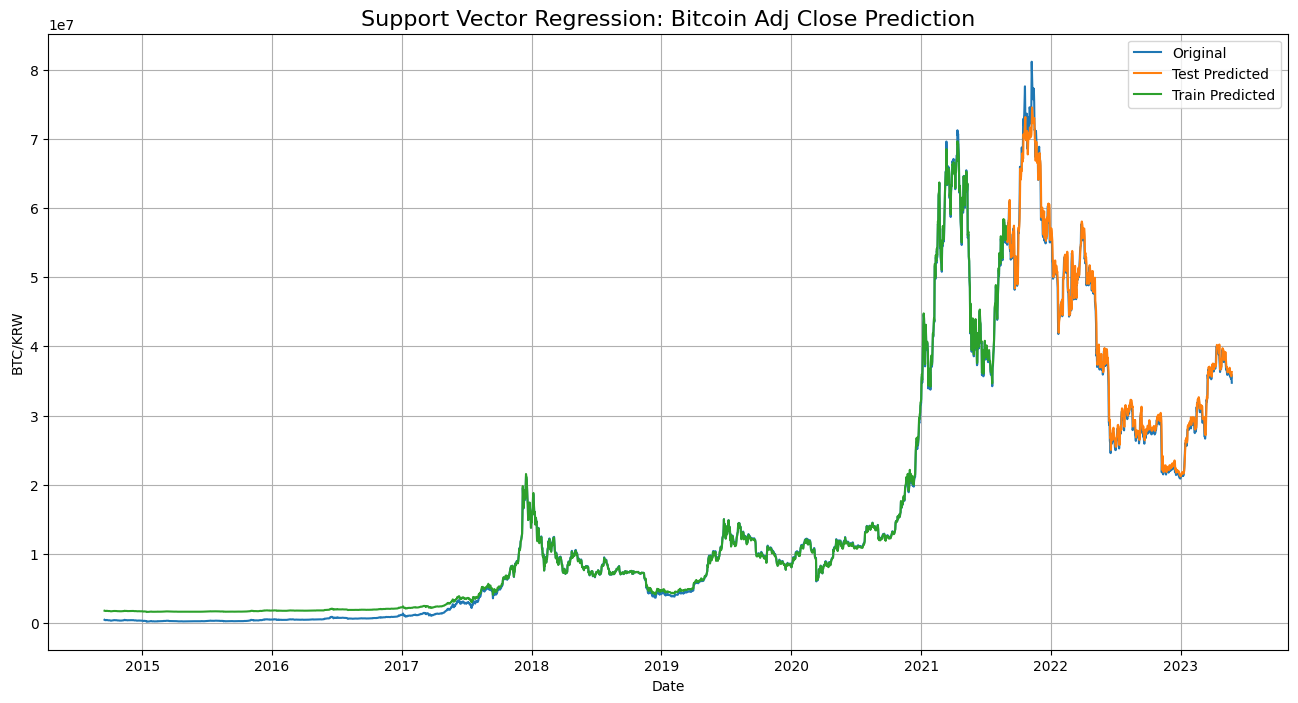

In [612]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Adj Close 선택
data = btc_krw_df['Adj Close']

# 학습 데이터와 테스트 데이터 분리
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# 특성(X)과 타겟(y) 분리
# X_train, y_train = train_data_diff.values[:-1], train_data_diff.values[1:]
# X_test, y_test = test_data_diff.values[:-1], test_data_diff.values[1:]
X_train, y_train = train_data.values[:-1], train_data.values[1:]
X_test, y_test = test_data.values[:-1], test_data.values[1:]

# 표준화 스케일링 수행
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))
y_train_scaled = scaler.transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

# 결측값 제거
X_train_scaled = X_train_scaled[~np.isnan(X_train_scaled)].reshape(-1, 1)
X_test_scaled = X_test_scaled[~np.isnan(X_test_scaled)].reshape(-1, 1)
y_train_scaled = y_train_scaled[~np.isnan(y_train_scaled)].reshape(-1, 1)
y_test_scaled = y_test_scaled[~np.isnan(y_test_scaled)].reshape(-1, 1)

# SVR 모델 생성 및 학습
model = SVR(kernel='rbf',  C=1e3, gamma=0.1)
model.fit(X_train_scaled, y_train_scaled)

# 훈련 데이터에 대한 예측 수행
X_train_pred_scaled = model.predict(X_train_scaled)
X_test_pred_scaled = model.predict(X_test_scaled)

# 정상화에 대한 원상복구
X_train_pred_inv = scaler.inverse_transform(X_train_pred_scaled.reshape(-1, 1))
X_test_pred_inv = scaler.inverse_transform(X_test_pred_scaled.reshape(-1, 1))

# 예측 결과에 날짜 인덱스와 Adj Close 컬럼 추가
X_train_pred_df = pd.DataFrame(X_train_pred_inv, index=train_data.index[:len(train_data)-1], columns=["Adj Close"])
X_test_pred_df = pd.DataFrame(X_test_pred_inv, index=test_data.index[1:len(train_data)-1], columns=["Adj Close"])

# 시각화
plt.figure(figsize=(16, 8))
plt.plot(data, label='Original')
plt.plot(X_test_pred_df.index, X_test_pred_df['Adj Close'], label='Test Predicted')
plt.plot(X_train_pred_df.index, X_train_pred_df['Adj Close'], label='Train Predicted')
plt.xlabel('Date')
plt.ylabel('BTC/KRW')
plt.legend()
plt.title('Support Vector Regression: Bitcoin Adj Close Prediction', fontsize=16)
plt.grid()
plt.show()

In [613]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 성능 지표 계산
mse = mean_squared_error(y_test, X_test_pred_inv)
mae = mean_absolute_error(y_test, X_test_pred_inv)
r2 = r2_score(y_test, X_test_pred_inv)

# SVM Confidence 계산
svm_confidence = model.score(X_test_scaled, y_test_scaled)

# 출력
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("SVM Confidence:", svm_confidence)

Mean Squared Error (MSE): 2383943833056.7803
Mean Absolute Error (MAE): 1050092.773735505
R-squared (R2): 0.989188121647347
SVM Confidence: 0.989188121647347


### 에측

In [635]:
# 가장 최근의 데이터를 기반으로 입력 값을 생성
last_data = data[-1:].values.reshape(-1, 1)
last_data_scaled = scaler.transform(last_data)

# 다음 날의 가격 예측
next_day_pred_scaled = model.predict(last_data_scaled)
next_day_pred_inv = scaler.inverse_transform(next_day_pred_scaled.reshape(-1, 1))

# 예측 결과 출력
print("다음 날의 가격 예측:", next_day_pred_inv[0][0])

다음 날의 가격 예측: 35120081.670093745


In [636]:
import datetime

# 5월 27일부터 6월 2일까지의 날짜 범위 생성
start_date = datetime.datetime(2023, 5, 27)
end_date = datetime.datetime(2023, 6, 2)
date_range = pd.date_range(start_date, end_date, freq='D')

# 예측할 기간의 데이터 생성
pred_data = []
last_data = data[-1:].values.reshape(-1, 1)
last_data_scaled = scaler.transform(last_data)

for i in range(len(date_range)):
    # 다음 날의 가격 예측
    next_day_pred_scaled = model.predict(last_data_scaled)
    next_day_pred_inv = scaler.inverse_transform(next_day_pred_scaled.reshape(-1, 1))
    
    # 결과를 리스트에 추가
    pred_data.append(next_day_pred_inv[0][0])
    
    # 다음 날의 데이터를 다시 입력값으로 사용
    last_data = next_day_pred_inv.reshape(-1, 1)
    last_data_scaled = scaler.transform(last_data)

# 예측 결과 출력
pred_df = pd.DataFrame(pred_data, index=date_range, columns=["Adj Close"])
print(pred_df)

               Adj Close
2023-05-27  3.512008e+07
2023-05-28  3.549704e+07
2023-05-29  3.586196e+07
2023-05-30  3.621514e+07
2023-05-31  3.655691e+07
2023-06-01  3.688768e+07
2023-06-02  3.720785e+07


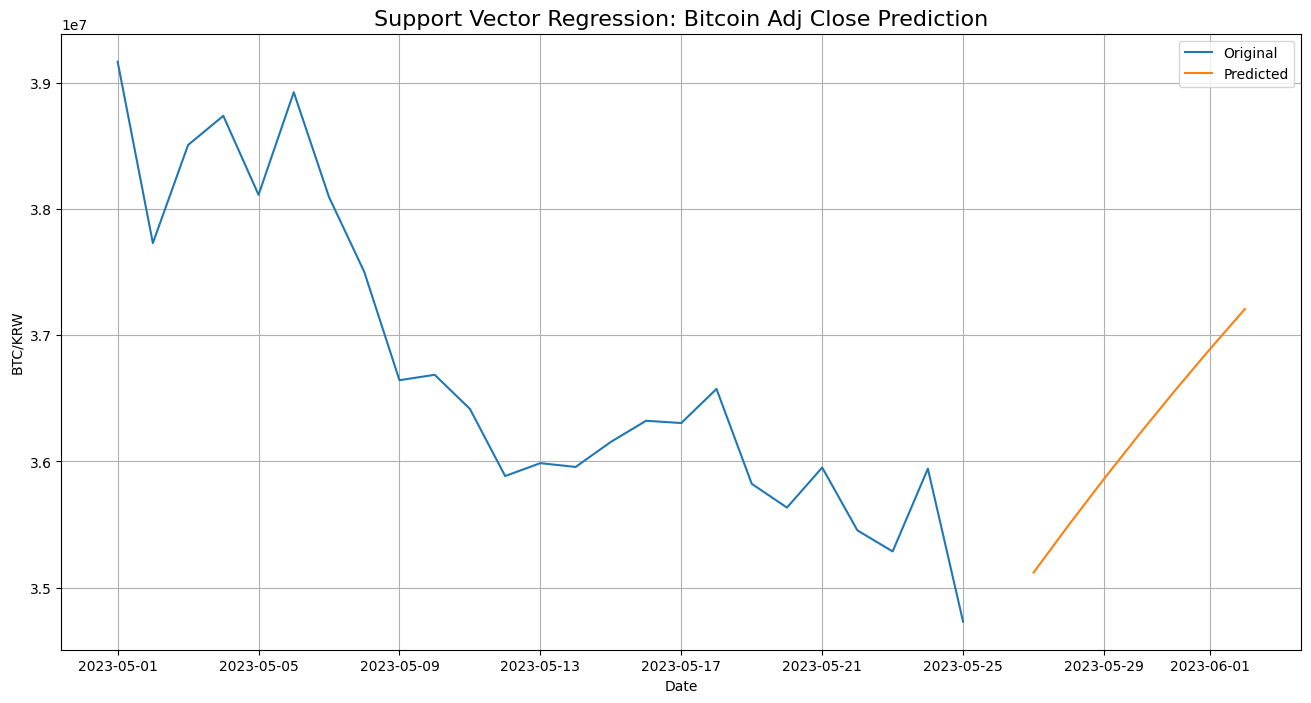

In [637]:
# 시각화
plt.figure(figsize=(16, 8))
plt.plot(data.loc['2023-05'], label='Original')
plt.plot(pred_df.index, pred_df['Adj Close'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('BTC/KRW')
plt.legend()
plt.title('Support Vector Regression: Bitcoin Adj Close Prediction', fontsize=16)
plt.grid()
plt.show()

In [670]:
# 5월 27일부터 6월 2일까지의 날짜 범위 생성
start_date = datetime.datetime(2023, 5, 25)
end_date = datetime.datetime(2023, 6, 2)
date_range = pd.date_range(start_date, end_date, freq='D')

# 예측할 기간의 데이터 생성
pred_data = []
last_data = data[-7:].values.reshape(-1, 1)
last_data_scaled = scaler.transform(last_data)

for i in range(len(date_range)):
    # 다음 날의 가격 예측
    next_day_pred_scaled = model.predict(last_data_scaled)
    next_day_pred_inv = scaler.inverse_transform(next_day_pred_scaled.reshape(-1, 1))
    
    # 결과를 리스트에 추가
    pred_data.append(next_day_pred_inv[0][0])
    
    # 다음 날의 데이터를 다시 입력값으로 사용
    last_data = np.append(last_data[1:], next_day_pred_inv).reshape(-1, 1)
    last_data_scaled = scaler.transform(last_data)

# 예측 결과 출력
pred_df = pd.DataFrame(pred_data, index=date_range, columns=["Adj Close"])
print(pred_df)

               Adj Close
2023-05-25  3.617783e+07
2023-05-26  3.599543e+07
2023-05-27  3.630253e+07
2023-05-28  3.582067e+07
2023-05-29  3.565904e+07
2023-05-30  3.629369e+07
2023-05-31  3.512008e+07
2023-06-01  3.652082e+07
2023-06-02  3.634430e+07


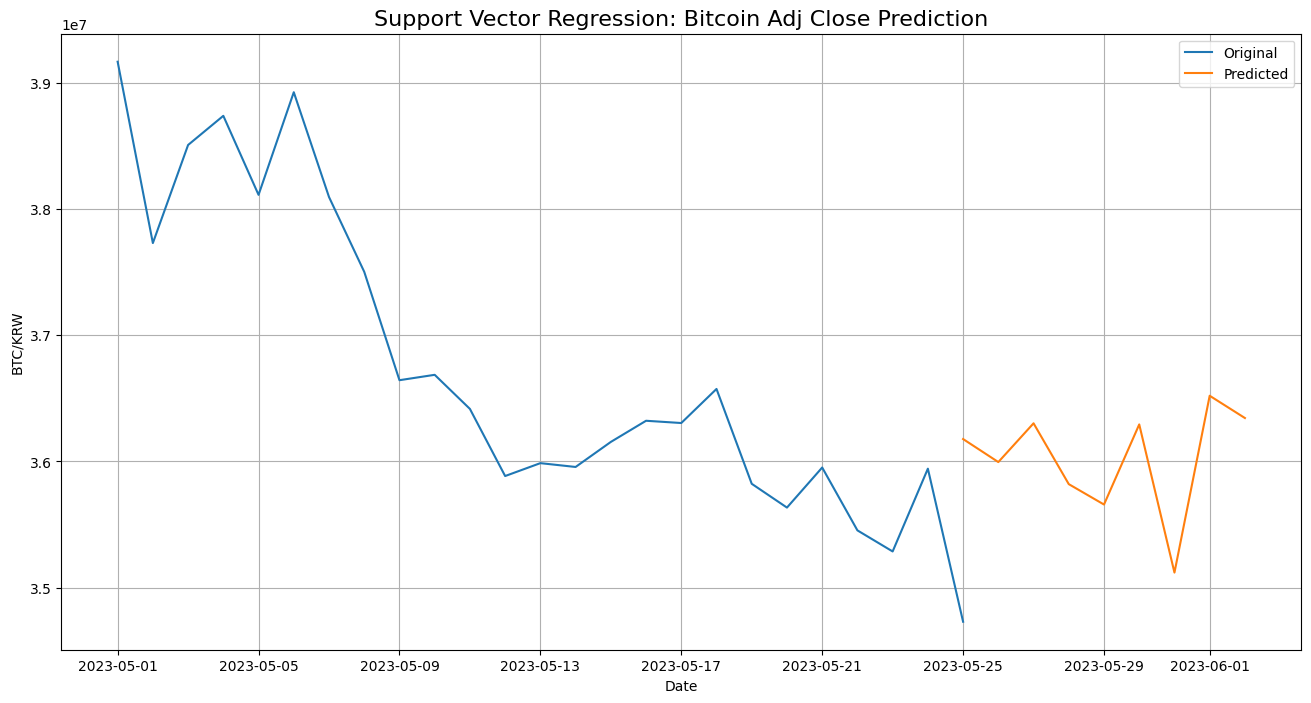

In [671]:
# 시각화
plt.figure(figsize=(16, 8))
plt.plot(data.loc['2023-05'], label='Original')
plt.plot(pred_df.index, pred_df['Adj Close'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('BTC/KRW')
plt.legend()
plt.title('Support Vector Regression: Bitcoin Adj Close Prediction', fontsize=16)
plt.grid()
plt.show()